In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
all_data = pd.read_csv("/dccstor/ipc1/CAR/DREAM/DREAMdata/all_cl_time_aligned.csv")

In [3]:
all_data

,treatment,cell_line,time,cellID,fileID,b.CATENIN,cleavedCas,CyclinB,GAPDH,IdU,...,p.PLCg2,p.RB,p.S6,p.S6K,p.SMAD23,p.SRC,p.STAT1,p.STAT3,p.STAT5,time_course
0,EGF,HCC1428,0.0,1,29,2.277863,1.577461,2.515730,2.965038,6.90317,...,4.419839,3.26107,7.03802,2.462533,1.597266,3.838360,4.049111,0.652426,3.305500,A
1,EGF,HCC1428,0.0,1,95,0.829853,1.953114,2.446810,3.426870,6.80673,...,3.198912,3.98929,3.41358,2.541979,2.594581,2.234090,2.796784,2.005433,3.396518,B
2,EGF,HCC1428,0.0,2,29,1.746819,3.045100,1.635950,2.459020,6.06703,...,2.809153,2.21759,3.31012,0.331558,1.669024,3.150189,3.229133,0.652426,3.241775,A
3,EGF,HCC1428,0.0,2,95,1.845799,3.538038,3.041430,2.508841,5.71532,...,3.177542,2.81194,7.28994,1.817634,2.223754,2.449400,3.094784,2.137521,3.303891,B
4,EGF,HCC1428,0.0,3,29,0.739657,3.386717,1.574390,3.104396,6.20346,...,2.596193,5.30232,4.63872,2.318320,2.303349,2.829673,2.343361,0.652426,2.180254,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23131339,iPKC,T47D,60.0,3885,4444,0.796624,2.817705,2.708316,2.649728,5.30164,...,2.408345,2.71991,6.08711,1.649240,2.360670,2.825340,3.027605,2.544341,2.909578,B
23131340,iPKC,T47D,60.0,3886,4444,2.080326,3.073579,2.283993,4.164062,4.36651,...,3.454036,1.65488,8.32390,1.800680,2.093250,2.999610,3.747098,1.558878,2.663090,B
23131341,iPKC,T47D,60.0,3887,4444,0.796624,3.327099,2.626595,2.826593,5.32818,...,3.095702,2.12746,7.71649,2.712010,1.918540,2.640700,3.471636,2.576593,3.053585,B
23131342,iPKC,T47D,60.0,3888,4444,0.796624,2.488476,2.830036,3.098706,5.44272,...,2.801503,1.65488,7.86357,2.232220,2.026130,2.833090,3.484447,0.576076,2.616188,B


In [4]:
all_data.isna().sum()

treatment              0
cell_line              0
time                   0
cellID                 0
fileID                 0
b.CATENIN              0
cleavedCas             0
CyclinB                0
GAPDH                  0
IdU                    0
Ki.67                  0
p.4EBP1                0
p.Akt.Ser473.          0
p.AKT.Thr308.          0
p.AMPK                 0
p.BTK                  0
p.CREB                 0
p.ERK                  0
p.FAK                  0
p.GSK3b                0
p.H3                   0
p.HER2           6070638
p.JNK                  0
p.MAP2K3               0
p.MAPKAPK2             0
p.MEK                  0
p.MKK3.MKK6            0
p.MKK4                 0
p.NFkB                 0
p.p38                  0
p.p53                  0
p.p90RSK               0
p.PDPK1                0
p.PLCg2          2248286
p.RB                   0
p.S6                   0
p.S6K                  0
p.SMAD23               0
p.SRC                  0
p.STAT1                0


In [5]:
excluding_test_data = all_data.copy()

# subchallenge 1

In [6]:
excluding_test_data.shape

(23131344, 43)

In [7]:
# Subchallenge 1
sc1_cl = ["AU565", "EFM19", "HCC2218", "LY2", "MACLS2", "MDAMB436"]
sc1_markers = ["p.ERK", "p.PLCg2", "p.HER2", "p.S6", "p.Akt.Ser473."]

if not len(excluding_test_data.loc[excluding_test_data["cell_line"].isin(sc1_cl), sc1_markers])==0:
    excluding_test_data.loc[excluding_test_data["cell_line"].isin(sc1_cl), sc1_markers] = np.nan

sc1_test_set = pd.read_csv("/dccstor/ipc1/CAR/DREAM/DREAMdata/Challenge_data/sc1gold.csv")


In [8]:
(all_data.loc[all_data["cell_line"].isin(sc1_cl), sc1_markers]).isna().sum()

p.ERK            0
p.PLCg2          0
p.HER2           0
p.S6             0
p.Akt.Ser473.    0
dtype: int64

In [9]:
print(sc1_test_set["time"].unique())
print([True if time in all_data["time"].unique() else False for time in sc1_test_set["time"].unique() ])
sc1_test_set.loc[sc1_test_set["time"]==18, "time"] = 17
sc1_test_set.loc[sc1_test_set["time"]==14, "time"] = 13
print([True if time in all_data["time"].unique() else False for time in sc1_test_set["time"].unique() ])


[ 0.   7.   9.  13.  17.  23.  30.  40.  60.   5.5 14.  18. ]
[True, True, True, True, True, True, True, True, True, True, False, False]
[True, True, True, True, True, True, True, True, True, True]


In [10]:
all_data.isna().sum()

treatment              0
cell_line              0
time                   0
cellID                 0
fileID                 0
b.CATENIN              0
cleavedCas             0
CyclinB                0
GAPDH                  0
IdU                    0
Ki.67                  0
p.4EBP1                0
p.Akt.Ser473.          0
p.AKT.Thr308.          0
p.AMPK                 0
p.BTK                  0
p.CREB                 0
p.ERK                  0
p.FAK                  0
p.GSK3b                0
p.H3                   0
p.HER2           6070638
p.JNK                  0
p.MAP2K3               0
p.MAPKAPK2             0
p.MEK                  0
p.MKK3.MKK6            0
p.MKK4                 0
p.NFkB                 0
p.p38                  0
p.p53                  0
p.p90RSK               0
p.PDPK1                0
p.PLCg2          2248286
p.RB                   0
p.S6                   0
p.S6K                  0
p.SMAD23               0
p.SRC                  0
p.STAT1                0


In [11]:
missing_HER2 = set(all_data.loc[all_data["p.HER2"].isna(), "cell_line"].drop_duplicates().values)

missing_PLCg2 = set(all_data.loc[all_data["p.PLCg2"].isna(), "cell_line"].drop_duplicates().values)

In [12]:
missing_HER2

{'BT483',
 'HCC1187',
 'HCC1419',
 'HCC1569',
 'HCC1806',
 'HCC1937',
 'HCC70',
 'MCF12A',
 'MDAMB231',
 'MDAMB361',
 'MDAMB453',
 'MDAMB468',
 'MDAkb2',
 'T47D',
 'UACC893'}

# subchallenge 2

In [13]:
# Subchallenge 2
cond_and_cl = {"iEGFR": ["MDAMB468", "MCF12A", "BT483"],
               "iMEK": ["184B5", "ZR751", "HCC202"],
               "iPI3K": ["UACC3199", "SKBR3", "MDAMB231"],
               "iPKC": ["HCC1806", "Hs578T", "HCC1428"]}

In [14]:
excluding_test_data.shape

(23131344, 43)

In [15]:
# SC2 is already not in the full cell line dataframe:
sc2_test_set = []
for treatment, cell_lines in cond_and_cl.items():
    temp = excluding_test_data.loc[(excluding_test_data["treatment"]==treatment)&(excluding_test_data["cell_line"].isin(cell_lines)), :]
    if len(temp)==0:
        print(treatment, cell_lines)
    else:
        sc2_test_set.append(temp)
        excluding_test_data = excluding_test_data.loc[~((excluding_test_data["treatment"]==treatment)&(excluding_test_data["cell_line"].isin(cell_lines))), :]
        
if len(sc2_test_set)==0:
    sc2_test_set = pd.read_csv("/dccstor/ipc1/CAR/DREAM/DREAMdata/Challenge_data/sc2gold.csv")

iEGFR ['MDAMB468', 'MCF12A', 'BT483']
iMEK ['184B5', 'ZR751', 'HCC202']
iPI3K ['UACC3199', 'SKBR3', 'MDAMB231']
iPKC ['HCC1806', 'Hs578T', 'HCC1428']


In [16]:
excluding_test_data.shape

(23131344, 43)

In [17]:
print([True if time in all_data["time"].unique() else False for time in sc2_test_set["time"].unique() ])  
sc2_test_set.loc[sc2_test_set["time"]==16, "time"] = 17
print([True if time in all_data["time"].unique() else False for time in sc2_test_set["time"].unique() ])  


[True, True, True, True, True, True, True, False]
[True, True, True, True, True, True, True]


In [18]:
# We need to add SC2 test data to the dataframe
all_data = pd.concat([all_data, sc2_test_set])


In [19]:
all_data.isna().sum()

treatment              0
cell_line              0
time                   0
cellID                 0
fileID                 0
b.CATENIN              0
cleavedCas             0
CyclinB                0
GAPDH                  0
IdU                    0
Ki.67                  0
p.4EBP1                0
p.Akt.Ser473.          0
p.AKT.Thr308.          0
p.AMPK                 0
p.BTK                  0
p.CREB                 0
p.ERK                  0
p.FAK                  0
p.GSK3b                0
p.H3                   0
p.HER2           6781533
p.JNK                  0
p.MAP2K3               0
p.MAPKAPK2             0
p.MEK                  0
p.MKK3.MKK6            0
p.MKK4                 0
p.NFkB                 0
p.p38                  0
p.p53                  0
p.p90RSK               0
p.PDPK1                0
p.PLCg2          2959181
p.RB                   0
p.S6                   0
p.S6K                  0
p.SMAD23               0
p.SRC                  0
p.STAT1                0


In [20]:
missing_HER2 = set(all_data.loc[all_data["p.HER2"].isna(), "cell_line"].drop_duplicates().values)

missing_PLCg2 = set(all_data.loc[all_data["p.PLCg2"].isna(), "cell_line"].drop_duplicates().values)

missing_timecourse = set(all_data.loc[all_data["time_course"].isna(), "cell_line"].drop_duplicates().values)

# subchallenge 3

In [21]:
excluding_test_data.shape

(23131344, 43)

In [22]:
# Subchallenge 3 treatment already not in full dataframe
treatment = "imTOR"

print(len(excluding_test_data[excluding_test_data["treatment"]==treatment]))

sc3_test_set = pd.read_csv("/dccstor/ipc1/CAR/DREAM/DREAMdata/Challenge_data/sc3gold.csv")


0


In [23]:
print(sc3_test_set["time"].unique())
print([True if time in all_data["time"].unique() else False for time in sc3_test_set["time"].unique() ])  
sc3_test_set.loc[sc3_test_set["time"]==16, "time"] = 17
sc3_test_set.loc[sc3_test_set["time"]==14, "time"] = 13
print([True if time in all_data["time"].unique() else False for time in sc3_test_set["time"].unique() ])  


[ 0  7  9 13 17 40 60 14 16]
[True, True, True, True, True, True, True, False, False]
[True, True, True, True, True, True, True]


In [24]:
all_data = pd.concat([all_data, sc3_test_set])

In [25]:
all_data.isna().sum()

treatment              0
cell_line              0
time                   0
cellID                 0
fileID                 0
b.CATENIN              0
cleavedCas             0
CyclinB                0
GAPDH                  0
IdU                    0
Ki.67                  0
p.4EBP1                0
p.Akt.Ser473.          0
p.AKT.Thr308.          0
p.AMPK                 0
p.BTK                  0
p.CREB                 0
p.ERK                  0
p.FAK                  0
p.GSK3b                0
p.H3                   0
p.HER2           9417245
p.JNK                  0
p.MAP2K3               0
p.MAPKAPK2             0
p.MEK                  0
p.MKK3.MKK6            0
p.MKK4                 0
p.NFkB                 0
p.p38                  0
p.p53                  0
p.p90RSK               0
p.PDPK1                0
p.PLCg2          5594893
p.RB                   0
p.S6                   0
p.S6K                  0
p.SMAD23               0
p.SRC                  0
p.STAT1                0


In [26]:
all_data['treatment'].unique()

array(['EGF', 'full', 'iEGFR', 'iMEK', 'iPI3K', 'iPKC', 'imTOR'],
      dtype=object)

In [27]:
missing_HER2 = set(all_data.loc[all_data["p.HER2"].isna(), "cell_line"].drop_duplicates().values)

missing_PLCg2 = set(all_data.loc[all_data["p.PLCg2"].isna(), "cell_line"].drop_duplicates().values)

missing_timecourse = set(all_data.loc[all_data["time_course"].isna(), "cell_line"].drop_duplicates().values)

In [28]:
sc3_test_set.isna().sum()

treatment        0
cell_line        0
time             0
cellID           0
fileID           0
b.CATENIN        0
cleavedCas       0
CyclinB          0
GAPDH            0
IdU              0
Ki.67            0
p.4EBP1          0
p.Akt.Ser473.    0
p.AKT.Thr308.    0
p.AMPK           0
p.BTK            0
p.CREB           0
p.ERK            0
p.FAK            0
p.GSK3b          0
p.H3             0
p.JNK            0
p.MAP2K3         0
p.MAPKAPK2       0
p.MEK            0
p.MKK3.MKK6      0
p.MKK4           0
p.NFkB           0
p.p38            0
p.p53            0
p.p90RSK         0
p.PDPK1          0
p.RB             0
p.S6             0
p.S6K            0
p.SMAD23         0
p.SRC            0
p.STAT1          0
p.STAT3          0
p.STAT5          0
dtype: int64

### PLCg2 and HER2 are not present in the gold standard of sc3, meaning that for ALL imTOR treatments we don't have values for HER2 nd PLCg2... :(

# subchallenge 4

In [29]:
excluding_test_data.shape

(23131344, 43)

In [30]:
# Subchallenge 4
# Of given cell lines only full is given, already correct
sc4_cl = ["CAL120", "CAMA1", "KPL1", "ZR75B"]

excluding_test_data.loc[excluding_test_data["cell_line"].isin(sc4_cl), "treatment"].unique()

array(['full'], dtype=object)

In [31]:
sc4_test_set = pd.read_csv("/dccstor/ipc1/CAR/DREAM/DREAMdata/Challenge_data/sc4gold.csv")
sc4_test_set

,cell_line,treatment,time,b.CATENIN,cleavedCas,CyclinB,GAPDH,IdU,Ki.67,p.4EBP1,...,p.p90RSK,p.PDPK1,p.RB,p.S6,p.S6K,p.SMAD23,p.SRC,p.STAT1,p.STAT3,p.STAT5
0,CAL120,EGF,0.0,0.642021,2.558938,2.722315,2.116092,6.346249,2.814086,3.053125,...,2.774018,1.843610,3.901693,3.948831,1.876049,1.750105,2.479909,2.833757,2.523510,2.573701
1,CAL120,EGF,5.5,0.969175,3.012168,3.117024,2.855420,6.332900,3.227027,3.657092,...,4.227944,2.362546,3.927360,4.779151,2.264465,2.252117,2.607964,3.151203,3.245815,2.657864
2,CAL120,EGF,7.0,0.943493,2.997356,3.110030,2.820019,6.332231,3.207450,3.633149,...,4.306342,2.353130,3.943294,4.976871,2.262942,2.230480,2.559745,3.141780,3.215268,2.642357
3,CAL120,EGF,9.0,0.734750,2.644117,2.850124,2.589844,6.379343,2.899169,3.285212,...,4.053468,2.075605,3.697823,5.256607,2.200480,1.950262,2.462547,3.021459,2.913630,2.679853
4,CAL120,EGF,13.0,0.677552,2.507360,2.710117,2.485199,6.392949,2.788088,3.071499,...,3.943640,1.954970,3.563982,5.757942,2.177485,1.821432,2.402964,3.013709,2.793514,2.665965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,ZR75B,iPKC,9.0,0.882095,2.139223,1.998373,2.743272,5.579956,2.583163,2.893560,...,4.252262,1.926116,4.637481,6.581880,2.296586,1.701937,2.635093,2.934636,2.039825,2.585977
186,ZR75B,iPKC,13.0,0.773585,2.012372,1.833804,2.621332,5.559205,2.441031,2.593788,...,3.762611,1.743599,4.530436,6.637086,2.209878,1.555405,2.506967,2.916227,1.845785,2.534098
187,ZR75B,iPKC,17.0,0.716518,1.916874,1.766884,2.584515,5.526560,2.398917,2.470942,...,3.472779,1.650303,4.404408,6.765272,2.174768,1.476460,2.472450,2.916854,1.783240,2.542054
188,ZR75B,iPKC,40.0,0.737845,2.023696,1.851008,2.668855,5.392364,2.549362,2.701711,...,2.777462,1.699293,4.094528,6.812586,2.120333,1.583112,2.484451,2.983884,1.842795,2.550517


In [32]:
print(sc4_test_set["time"].unique())
print([True if time in all_data["time"].unique() else False for time in sc4_test_set["time"].unique() ])  

[ 0.   5.5  7.   9.  13.  17.  23.  30.  40.  60. ]
[True, True, True, True, True, True, True, True, True, True]


In [33]:
# Since sc4 gold is median/mean expression, don't concatenate it
# all_data = pd.concat([all_data, sc4_test_set])

In [34]:
all_data.isna().sum()

treatment              0
cell_line              0
time                   0
cellID                 0
fileID                 0
b.CATENIN              0
cleavedCas             0
CyclinB                0
GAPDH                  0
IdU                    0
Ki.67                  0
p.4EBP1                0
p.Akt.Ser473.          0
p.AKT.Thr308.          0
p.AMPK                 0
p.BTK                  0
p.CREB                 0
p.ERK                  0
p.FAK                  0
p.GSK3b                0
p.H3                   0
p.HER2           9417245
p.JNK                  0
p.MAP2K3               0
p.MAPKAPK2             0
p.MEK                  0
p.MKK3.MKK6            0
p.MKK4                 0
p.NFkB                 0
p.p38                  0
p.p53                  0
p.p90RSK               0
p.PDPK1                0
p.PLCg2          5594893
p.RB                   0
p.S6                   0
p.S6K                  0
p.SMAD23               0
p.SRC                  0
p.STAT1                0


In [35]:
missing_HER2 = set(all_data.loc[all_data["p.HER2"].isna(), "cell_line"].drop_duplicates().values)

missing_PLCg2 = set(all_data.loc[all_data["p.PLCg2"].isna(), "cell_line"].drop_duplicates().values)

missing_timecourse = set(all_data.loc[all_data["time_course"].isna(), "cell_line"].drop_duplicates().values)

# Remove timecourse, as it contains many NaNs

In [36]:
all_data = all_data.drop(["time_course", "cellID", "fileID"], axis=1)

# Analysis of missing data

In [37]:
n_cell_lines = len(all_data["cell_line"].unique())
n_treatment = len(all_data["treatment"].unique())
n_times = len(all_data["time"].unique())

n_cell_lines*n_treatment*n_times == len(all_data.groupby(["cell_line", "treatment", "time"]).size())

False

In [38]:
n_cell_lines*n_treatment*n_times

4690

In [39]:
len(all_data.groupby(["cell_line", "treatment", "time"]).size())

2679

In [40]:
temp = all_data[["treatment", "time", "cell_line"]]
temp = temp[temp["time"]==9]
temp.drop_duplicates(inplace=True)

In [41]:
temp

,treatment,time,cell_line
36615,EGF,9.0,HCC1428
145429,iEGFR,9.0,HCC1428
202471,iMEK,9.0,HCC1428
260272,iPI3K,9.0,HCC1428
360652,EGF,9.0,HCC70
...,...,...,...
2324888,imTOR,9.0,OCUBM
2389174,imTOR,9.0,T47D
2450269,imTOR,9.0,UACC812
2517007,imTOR,9.0,UACC893


In [42]:
temp.groupby(["treatment", "time"]).size().loc[(temp.groupby(["treatment", "time"]).size() != 67).values, :]

treatment  time
EGF        9.0     62
iEGFR      9.0     62
iMEK       9.0     62
iPI3K      9.0     61
iPKC       9.0     62
imTOR      9.0     39
dtype: int64

In [43]:
temp.loc[temp["treatment"]=="imTOR", "cell_line"].unique()

array(['BT20', 'BT474', 'BT549', 'CAL148', 'CAL51', 'CAL851', 'DU4475',
       'EFM192A', 'EVSAT', 'HBL100', 'HCC1187', 'HCC1395', 'HCC1419',
       'HCC1500', 'HCC1569', 'HCC1599', 'HCC1937', 'HCC1954', 'HCC2185',
       'HCC3153', 'HCC38', 'HCC70', 'HDQP1', 'JIMT1', 'MCF7',
       'MDAMB134VI', 'MDAMB157', 'MDAMB175VII', 'MDAMB361', 'MDAMB415',
       'MDAMB453', 'MFM223', 'MPE600', 'MX1', 'OCUBM', 'T47D', 'UACC812',
       'UACC893', 'ZR7530'], dtype=object)

<AxesSubplot:xlabel='None-time', ylabel='cell_line'>

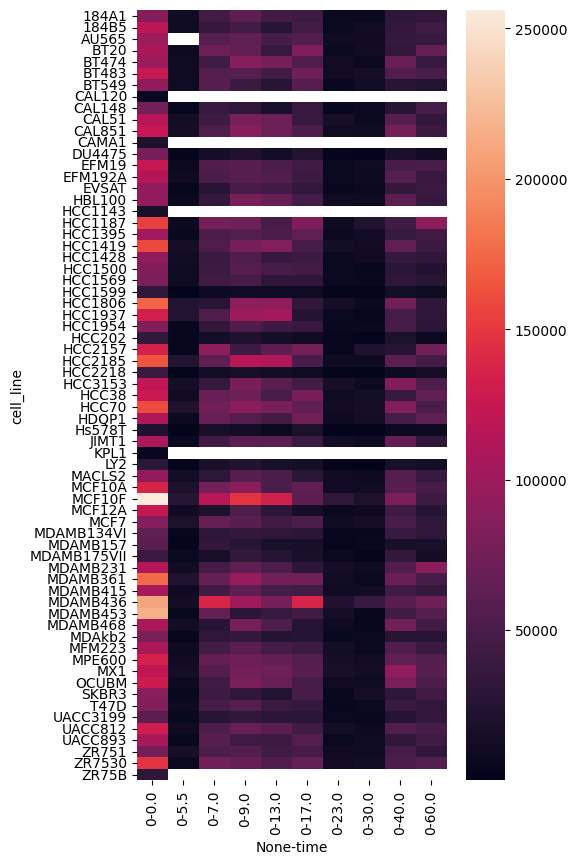

In [44]:
plt_data = pd.pivot_table(all_data.groupby(["cell_line", "time"]).size().reset_index(), index="cell_line", columns="time")
plt.figure(figsize=(5,10))
sns.heatmap(plt_data, yticklabels=True)

<AxesSubplot:xlabel='None-time', ylabel='cell_line'>

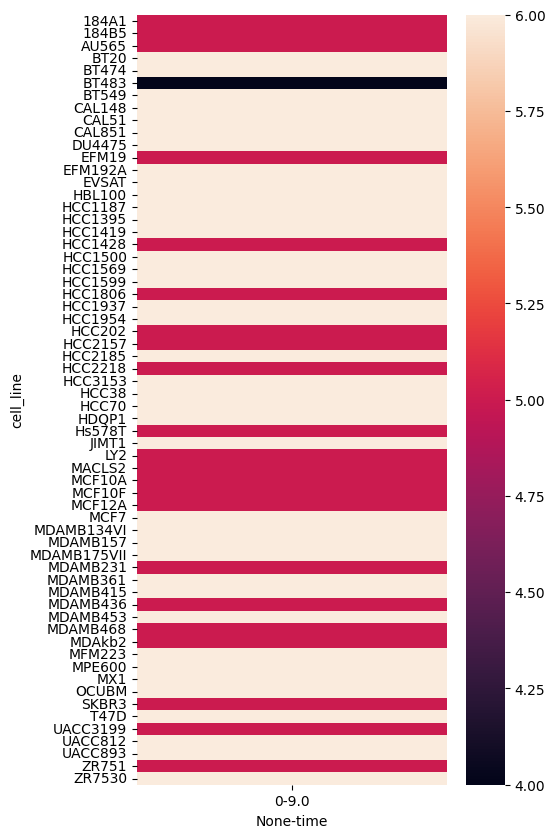

In [45]:
plt_data = pd.pivot_table(temp.groupby(["cell_line", "time"]).size().reset_index(), index="cell_line", columns="time")
plt.figure(figsize=(5,10))
sns.heatmap(plt_data, yticklabels=True)

In [46]:
all_cond_cl = list((temp.groupby(["cell_line", "time"]).size()[ temp.groupby(["cell_line", "time"]).size()==6]).reset_index()["cell_line"].values)

In [47]:
temp2 = all_data[all_data["time"]==9]
temp2 = temp2[temp2["cell_line"].isin(all_cond_cl)]
temp2 = temp2.melt(id_vars=["treatment", "time", "cell_line"], value_name="expr", var_name="marker")
temp2 = temp2[~temp2["expr"].isna()]
temp2 = temp2.drop("expr", axis=1).drop_duplicates()
plt_data = pd.pivot_table(temp2.groupby(["cell_line", "treatment"]).size().reset_index(), index="cell_line", columns="treatment")


<AxesSubplot:xlabel='None-treatment', ylabel='cell_line'>

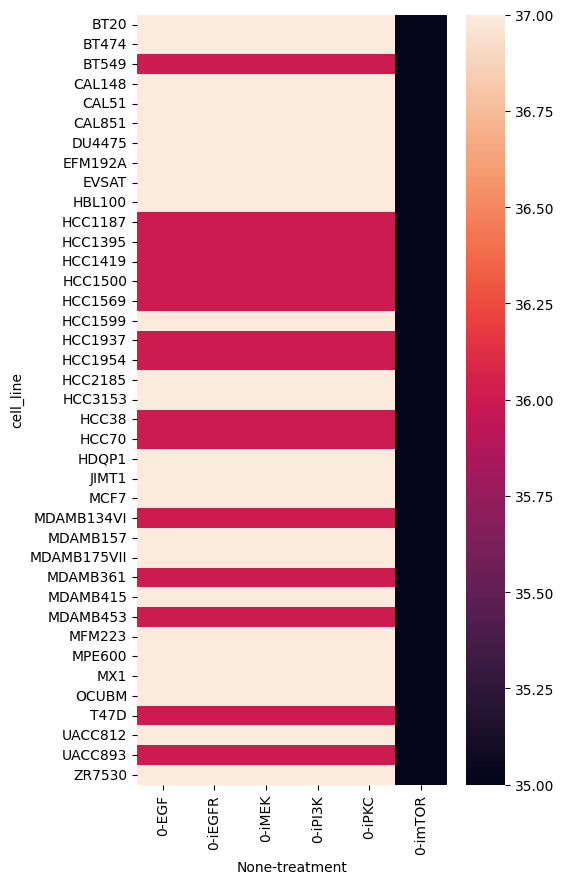

In [48]:
plt.figure(figsize=(5,10))
sns.heatmap(plt_data, yticklabels=True)

<AxesSubplot:xlabel='None-marker', ylabel='cell_line'>

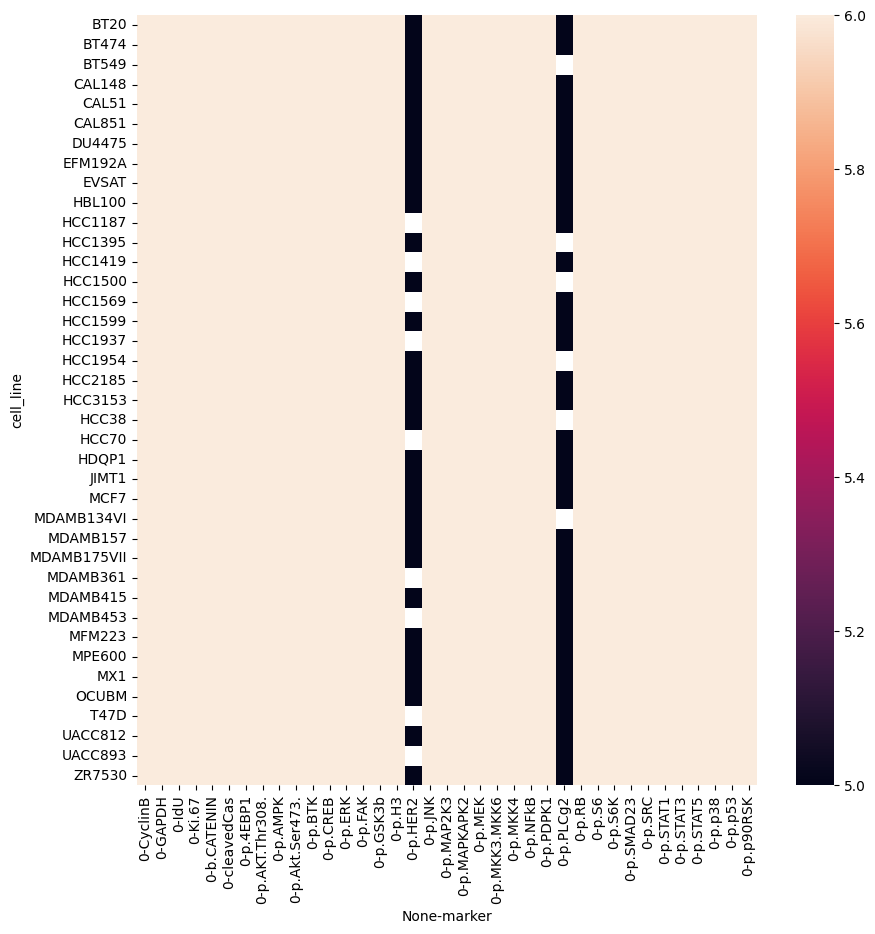

In [49]:
plt_data = pd.pivot_table(temp2.groupby(["cell_line", "marker"]).size().reset_index(), index="cell_line", columns="marker")
plt.figure(figsize=(10,10))
sns.heatmap(plt_data, yticklabels=True, xticklabels=True)

In [50]:
(temp2.groupby(["cell_line", "treatment"]).size()[temp2.groupby(["cell_line", "treatment"]).size()==37]).reset_index().groupby("cell_line").size()

cell_line
BT20           5
BT474          5
CAL148         5
CAL51          5
CAL851         5
DU4475         5
EFM192A        5
EVSAT          5
HBL100         5
HCC1599        5
HCC2185        5
HCC3153        5
HDQP1          5
JIMT1          5
MCF7           5
MDAMB157       5
MDAMB175VII    5
MDAMB415       5
MFM223         5
MPE600         5
MX1            5
OCUBM          5
UACC812        5
ZR7530         5
dtype: int64

In [51]:
all_cond_all_marker_t9 = list(set((temp2.groupby(["cell_line", "treatment"]).size()[temp2.groupby(["cell_line", "treatment"]).size()==37]).reset_index()["cell_line"].values))
all_cond_all_marker_t9                          

['HCC3153',
 'MDAMB175VII',
 'BT20',
 'HBL100',
 'CAL148',
 'HDQP1',
 'OCUBM',
 'MDAMB157',
 'UACC812',
 'ZR7530',
 'CAL51',
 'MFM223',
 'HCC2185',
 'BT474',
 'DU4475',
 'JIMT1',
 'MX1',
 'CAL851',
 'EFM192A',
 'MCF7',
 'EVSAT',
 'HCC1599',
 'MDAMB415',
 'MPE600']

# Save everything

In [52]:
excluding_test_data.to_csv("/dccstor/ipc1/CAR/DREAM/DREAMdata/all_cl_time_aligned_excl_changelle_test.csv")
sc1_test_set.to_csv("/dccstor/ipc1/CAR/DREAM/DREAMdata/Challenge_data/sc1_test_time_aligned.csv")
sc2_test_set.to_csv("/dccstor/ipc1/CAR/DREAM/DREAMdata/Challenge_data/sc2_test_time_aligned.csv")
sc3_test_set.to_csv("/dccstor/ipc1/CAR/DREAM/DREAMdata/Challenge_data/sc3_test_time_aligned.csv")
sc4_test_set.to_csv("/dccstor/ipc1/CAR/DREAM/DREAMdata/Challenge_data/sc4_test_time_aligned.csv")

In [53]:
save_path = "/dccstor/ipc1/CAR/DREAM/DREAMdata/Time_aligned_per_cell_line/CL_incl_test/"
for cl in all_data["cell_line"].unique():
    temp = all_data[all_data["cell_line"]==cl]
    temp.to_csv(f"{save_path}{cl}.csv", index=False)

In [54]:
save_path = "/dccstor/ipc1/CAR/DREAM/DREAMdata/Time_aligned_per_cell_line/"
for cl in excluding_test_data["cell_line"].unique():
    temp = excluding_test_data[excluding_test_data["cell_line"]==cl]
    temp.to_csv(f"{save_path}{cl}.csv", index=False)

In [55]:
save_path = "/dccstor/ipc1/CAR/DREAM/DREAMdata/Time_aligned_per_cell_line/Test/"
for cl in sc1_test_set["cell_line"].unique():
    print(cl)
    temp = sc1_test_set[sc1_test_set["cell_line"]==cl]
    temp.to_csv(f"{save_path}{cl}.csv", index=False)
for cl in sc2_test_set["cell_line"].unique():
    print(cl)
    temp = sc2_test_set[sc2_test_set["cell_line"]==cl]
    temp.to_csv(f"{save_path}{cl}.csv", index=False)
for cl in sc3_test_set["cell_line"].unique():
    print(cl)
    temp = sc3_test_set[sc3_test_set["cell_line"]==cl]
    temp.to_csv(f"{save_path}{cl}.csv", index=False)
for cl in sc4_test_set["cell_line"].unique():
    print(cl)
    temp = sc4_test_set[sc4_test_set["cell_line"]==cl]
    temp.to_csv(f"{save_path}{cl}.csv", index=False)

AU565
EFM19
HCC2218
LY2
MACLS2
MDAMB436
184B5
BT483
HCC1428
HCC1806
HCC202
Hs578T
MCF12A
MDAMB231
MDAMB468
SKBR3
UACC3199
ZR751
BT20
BT474
BT549
CAL148
CAL51
CAL851
DU4475
EFM192A
EVSAT
HBL100
HCC1187
HCC1395
HCC1419
HCC1500
HCC1569
HCC1599
HCC1937
HCC1954
HCC2185
HCC3153
HCC38
HCC70
HDQP1
JIMT1
MCF7
MDAMB134VI
MDAMB157
MDAMB175VII
MDAMB361
MDAMB415
MDAMB453
MFM223
MPE600
MX1
OCUBM
T47D
UACC812
UACC893
ZR7530
CAL120
CAMA1
HCC1143
KPL1
ZR75B


In [56]:
sc1_test_set["cell_line"].unique()

array(['AU565', 'EFM19', 'HCC2218', 'LY2', 'MACLS2', 'MDAMB436'],
      dtype=object)

In [57]:
sc1_test_set[sc1_test_set["cell_line"]==13]

,glob_cellID,cell_line,treatment,time,cellID,fileID,p.ERK,p.Akt.Ser473.,p.S6,p.HER2,p.PLCg2
